# Mall_Customers_Segmentation_using_K-Means_Clustering

## Problem Statement:
    
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

## Importing The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

## Importing the Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Finding Unique Values

### value_counts()

In [7]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [8]:
df.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

In [9]:
# considering only two columns to represent the data in 2D plot
x = df.iloc[:, [3,4]].values
# df['Annual Income (k$)','Spending Score (1-100)']

## Finding optimal number of clusters using Elbow method

## Elbow Method

===> k-means is a simple unsupervised machine learning algorithm that groups data into a specified number(k) of clusters

===> The elbow method runs k-means clustering on the dataset for a range of values for k (say like from 1-10) and then for
each value of k computes an average score for all clusters

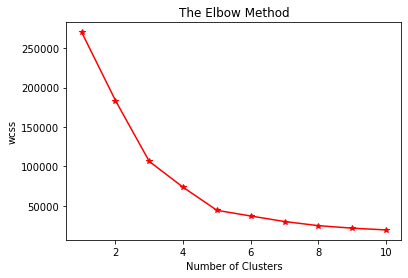

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)           # Inertia_ is an attribute of kmeans() used to display the wcss values

mpl.plot(range(1,11), wcss, 'r*-')
mpl.title('The Elbow Method')
mpl.xlabel('Number of Clusters')
mpl.ylabel('wcss')
mpl.show()

## Missing_Values()

In [11]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

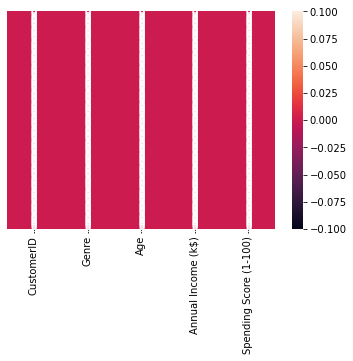

In [12]:
sb.heatmap(df.isnull(),annot = True,yticklabels = False)

## Label Encoding()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Genre"] = le.fit_transform(df["Genre"])


In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Training the K-Means model on the dataset

In [15]:
kmeans = KMeans(n_clusters = 5)
y_pred = kmeans.fit_predict(x)
y_pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

## Visualizing the Clusters

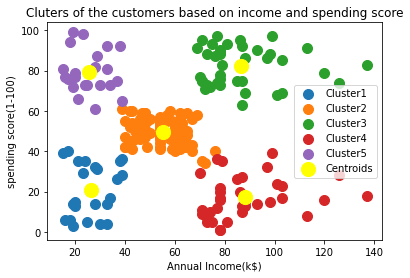

In [16]:
mpl.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s=100, label='Cluster1')
mpl.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s=100, label='Cluster2')
mpl.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s=100, label='Cluster3')
mpl.scatter(x[y_pred == 3,0], x[y_pred == 3,1], s=100, label='Cluster4')
mpl.scatter(x[y_pred == 4,0], x[y_pred == 4,1], s=100, label='Cluster5')
mpl.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', label='Centroids')
mpl.title('Cluters of the customers based on income and spending score')
mpl.xlabel('Annual Income(k$)')
mpl.ylabel('spending score(1-100)')
mpl.legend()
mpl.show()